# Kaggle Titanic competition

# Pre-processing

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

## Check for data-types and missing values

In [2]:
train = pd.read_csv('Datasets/Titanic/train.csv')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train["Ticket"].nunique()

681

In [5]:
test = pd.read_csv('Datasets/Titanic/test.csv')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Dropping unusable columns & convert to 1-hot encoding

In [6]:
# Not combining train and test data because we need to impute missing values of test data to train data

# Dropping columns
train_processed = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
train_processed = pd.get_dummies(train_processed, columns = ["Pclass", "Embarked"], dtype = int)
train_processed = pd.get_dummies(train_processed, columns = ["Sex"], drop_first = True, dtype = int) # Process seperately as we want 1 column only

train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Pclass_1    891 non-null    int64  
 6   Pclass_2    891 non-null    int64  
 7   Pclass_3    891 non-null    int64  
 8   Embarked_C  891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
 11  Sex_male    891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [7]:
# Do the same with test data
test_processed = test.drop(["Name", "Ticket", "Cabin"], axis = 1)
test_processed = pd.get_dummies(test_processed, columns = ["Pclass", "Embarked"], dtype = int)
test_processed = pd.get_dummies(test_processed, columns = ["Sex"], drop_first = True, dtype = int) # Process seperately as we want 1 column only

test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          332 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Pclass_1     418 non-null    int64  
 6   Pclass_2     418 non-null    int64  
 7   Pclass_3     418 non-null    int64  
 8   Embarked_C   418 non-null    int64  
 9   Embarked_Q   418 non-null    int64  
 10  Embarked_S   418 non-null    int64  
 11  Sex_male     418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


## Standardization

In [8]:
# Standardize using train data
# Perform before KNN to prevent "over-weighting" of features
col_list = ["Age","SibSp","Parch","Fare"]

for col in col_list:
    mean_train = train_processed[col].mean()
    std_train = train_processed[col].std()
    train_processed[col] = (train_processed[col] - mean_train)/ std_train
    test_processed[col] = (test_processed[col] - mean_train)/ std_train # Standardize test data with train data
    
train_processed

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,-0.530005,0.432550,-0.473408,-0.502163,0,0,1,0,0,1,1
1,1,0.571430,0.432550,-0.473408,0.786404,1,0,0,1,0,0,0
2,1,-0.254646,-0.474279,-0.473408,-0.488580,0,0,1,0,0,1,0
3,1,0.364911,0.432550,-0.473408,0.420494,1,0,0,0,0,1,0
4,0,0.364911,-0.474279,-0.473408,-0.486064,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.185807,-0.474279,-0.473408,-0.386454,0,1,0,0,0,1,1
887,1,-0.736524,-0.474279,-0.473408,-0.044356,1,0,0,0,0,1,0
888,0,NaN,0.432550,2.007806,-0.176164,0,0,1,0,0,1,0
889,1,-0.254646,-0.474279,-0.473408,-0.044356,1,0,0,1,0,0,1


## Imputing missing values

In [9]:
from sklearn.impute import KNNImputer

# Only impute without the ground truth lable
column_lables = train_processed.drop(["Survived"], axis = 1).columns.tolist()

# Initializing the Imputer
imputer = KNNImputer(n_neighbors = 3)
imputer.fit(train_processed.drop(["Survived"], axis = 1))

# Impute train
train_processed_survived = train_processed["Survived"]
train_imputed_ndarray = imputer.transform(train_processed.drop(["Survived"], axis = 1))
train_processed_imputed = pd.DataFrame(train_imputed_ndarray, columns = column_lables)
train_processed = pd.concat([train_processed_survived, train_processed_imputed], axis = 1)

# Impute test
test_processed_id = test_processed["PassengerId"]
# Transforming the test set without the column Passenger ID
test_imputed_ndarray = imputer.transform(test_processed.drop(["PassengerId"], axis = 1))
test_processed_imputed = pd.DataFrame(test_imputed_ndarray, columns = column_lables)
test_processed = pd.concat([test_processed_id, test_processed_imputed], axis = 1)

In [10]:
train_processed

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,-0.530005,0.432550,-0.473408,-0.502163,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1,0.571430,0.432550,-0.473408,0.786404,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,-0.254646,-0.474279,-0.473408,-0.488580,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,0.364911,0.432550,-0.473408,0.420494,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.364911,-0.474279,-0.473408,-0.486064,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.185807,-0.474279,-0.473408,-0.386454,0.0,1.0,0.0,0.0,0.0,1.0,1.0
887,1,-0.736524,-0.474279,-0.473408,-0.044356,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0,-0.782417,0.432550,2.007806,-0.176164,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,1,-0.254646,-0.474279,-0.473408,-0.044356,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [11]:
test_processed


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,892,0.330491,-0.474279,-0.473408,-0.490508,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,893,1.190988,0.432550,-0.473408,-0.507194,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,894,2.223584,-0.474279,-0.473408,-0.453112,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,895,-0.185807,-0.474279,-0.473408,-0.473739,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,896,-0.530005,0.432550,0.767199,-0.400792,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.300539,-0.474279,-0.473408,-0.486064,0.0,0.0,1.0,0.0,0.0,1.0,1.0
414,1306,0.640270,-0.474279,-0.473408,1.543379,1.0,0.0,0.0,1.0,0.0,0.0,0.0
415,1307,0.605850,-0.474279,-0.473408,-0.502163,0.0,0.0,1.0,0.0,0.0,1.0,1.0
416,1308,-0.300539,-0.474279,-0.473408,-0.486064,0.0,0.0,1.0,0.0,0.0,1.0,1.0


## Storing Processed Data

In [12]:
train_processed.to_csv("Datasets/Titanic/train_processed.csv", index = False)
test_processed.to_csv("Datasets/Titanic/test_processed.csv", index = False)

# Visualization/ EDA

## Imports

In [17]:
# Resuming the session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

import cmasher as cmr # For more fancy colours
import seaborn as sns

## Read pre-processed data

In [18]:
train = pd.read_csv("Datasets/Titanic/train_processed.csv")

train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,-0.530005,0.432550,-0.473408,-0.502163,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1,0.571430,0.432550,-0.473408,0.786404,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,-0.254646,-0.474279,-0.473408,-0.488580,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,0.364911,0.432550,-0.473408,0.420494,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.364911,-0.474279,-0.473408,-0.486064,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.185807,-0.474279,-0.473408,-0.386454,0.0,1.0,0.0,0.0,0.0,1.0,1.0
887,1,-0.736524,-0.474279,-0.473408,-0.044356,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0,-0.782417,0.432550,2.007806,-0.176164,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,1,-0.254646,-0.474279,-0.473408,-0.044356,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Correlation matrix

<Axes: >

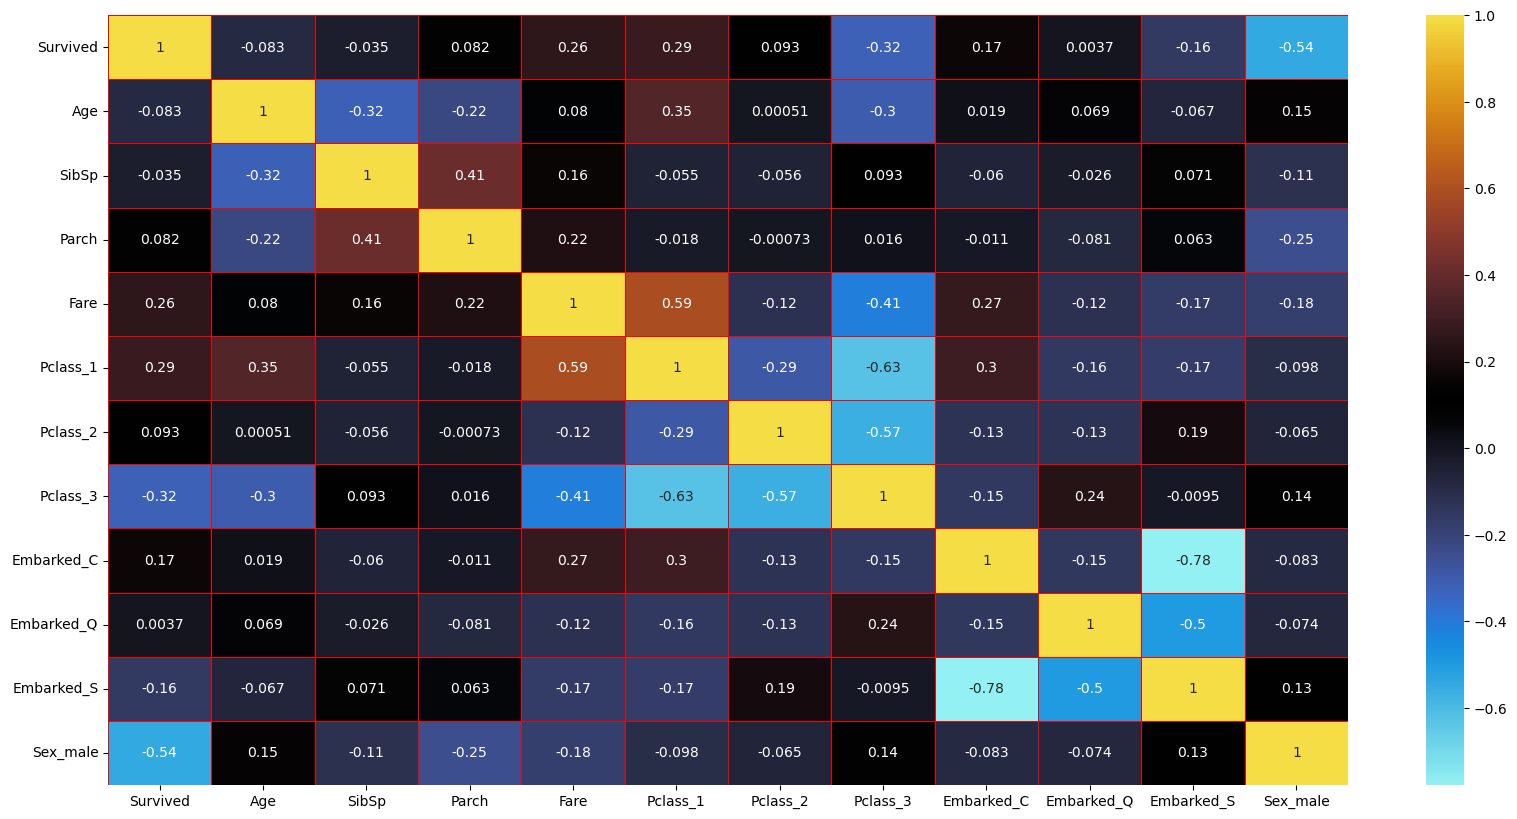

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot= True, cmap = 'cmr.iceburn', linecolor= 'r', linewidths=0.5)

## Plotting the Scatterplot Matrix

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='Pclass_1', ylabel='Survived'>,
        <Axes: xlabel='Pclass_2', ylabel='Survived'>,
        <Axes: xlabel='Pclass_3', ylabel='Survived'>,
        <Axes: xlabel='Embarked_C', ylabel='Survived'>,
        <Axes: xlabel='Embarked_Q', ylabel='Survived'>,
        <Axes: xlabel='Embarked_S', ylabel='Survived'>,
        <Axes: xlabel='Sex_male', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='Pclass_1', ylabel='Age'>,
        <Axes: xlabel='Pclass_2', ylabel='Age'>,
        <Axes: xlabel='Pclass_3'

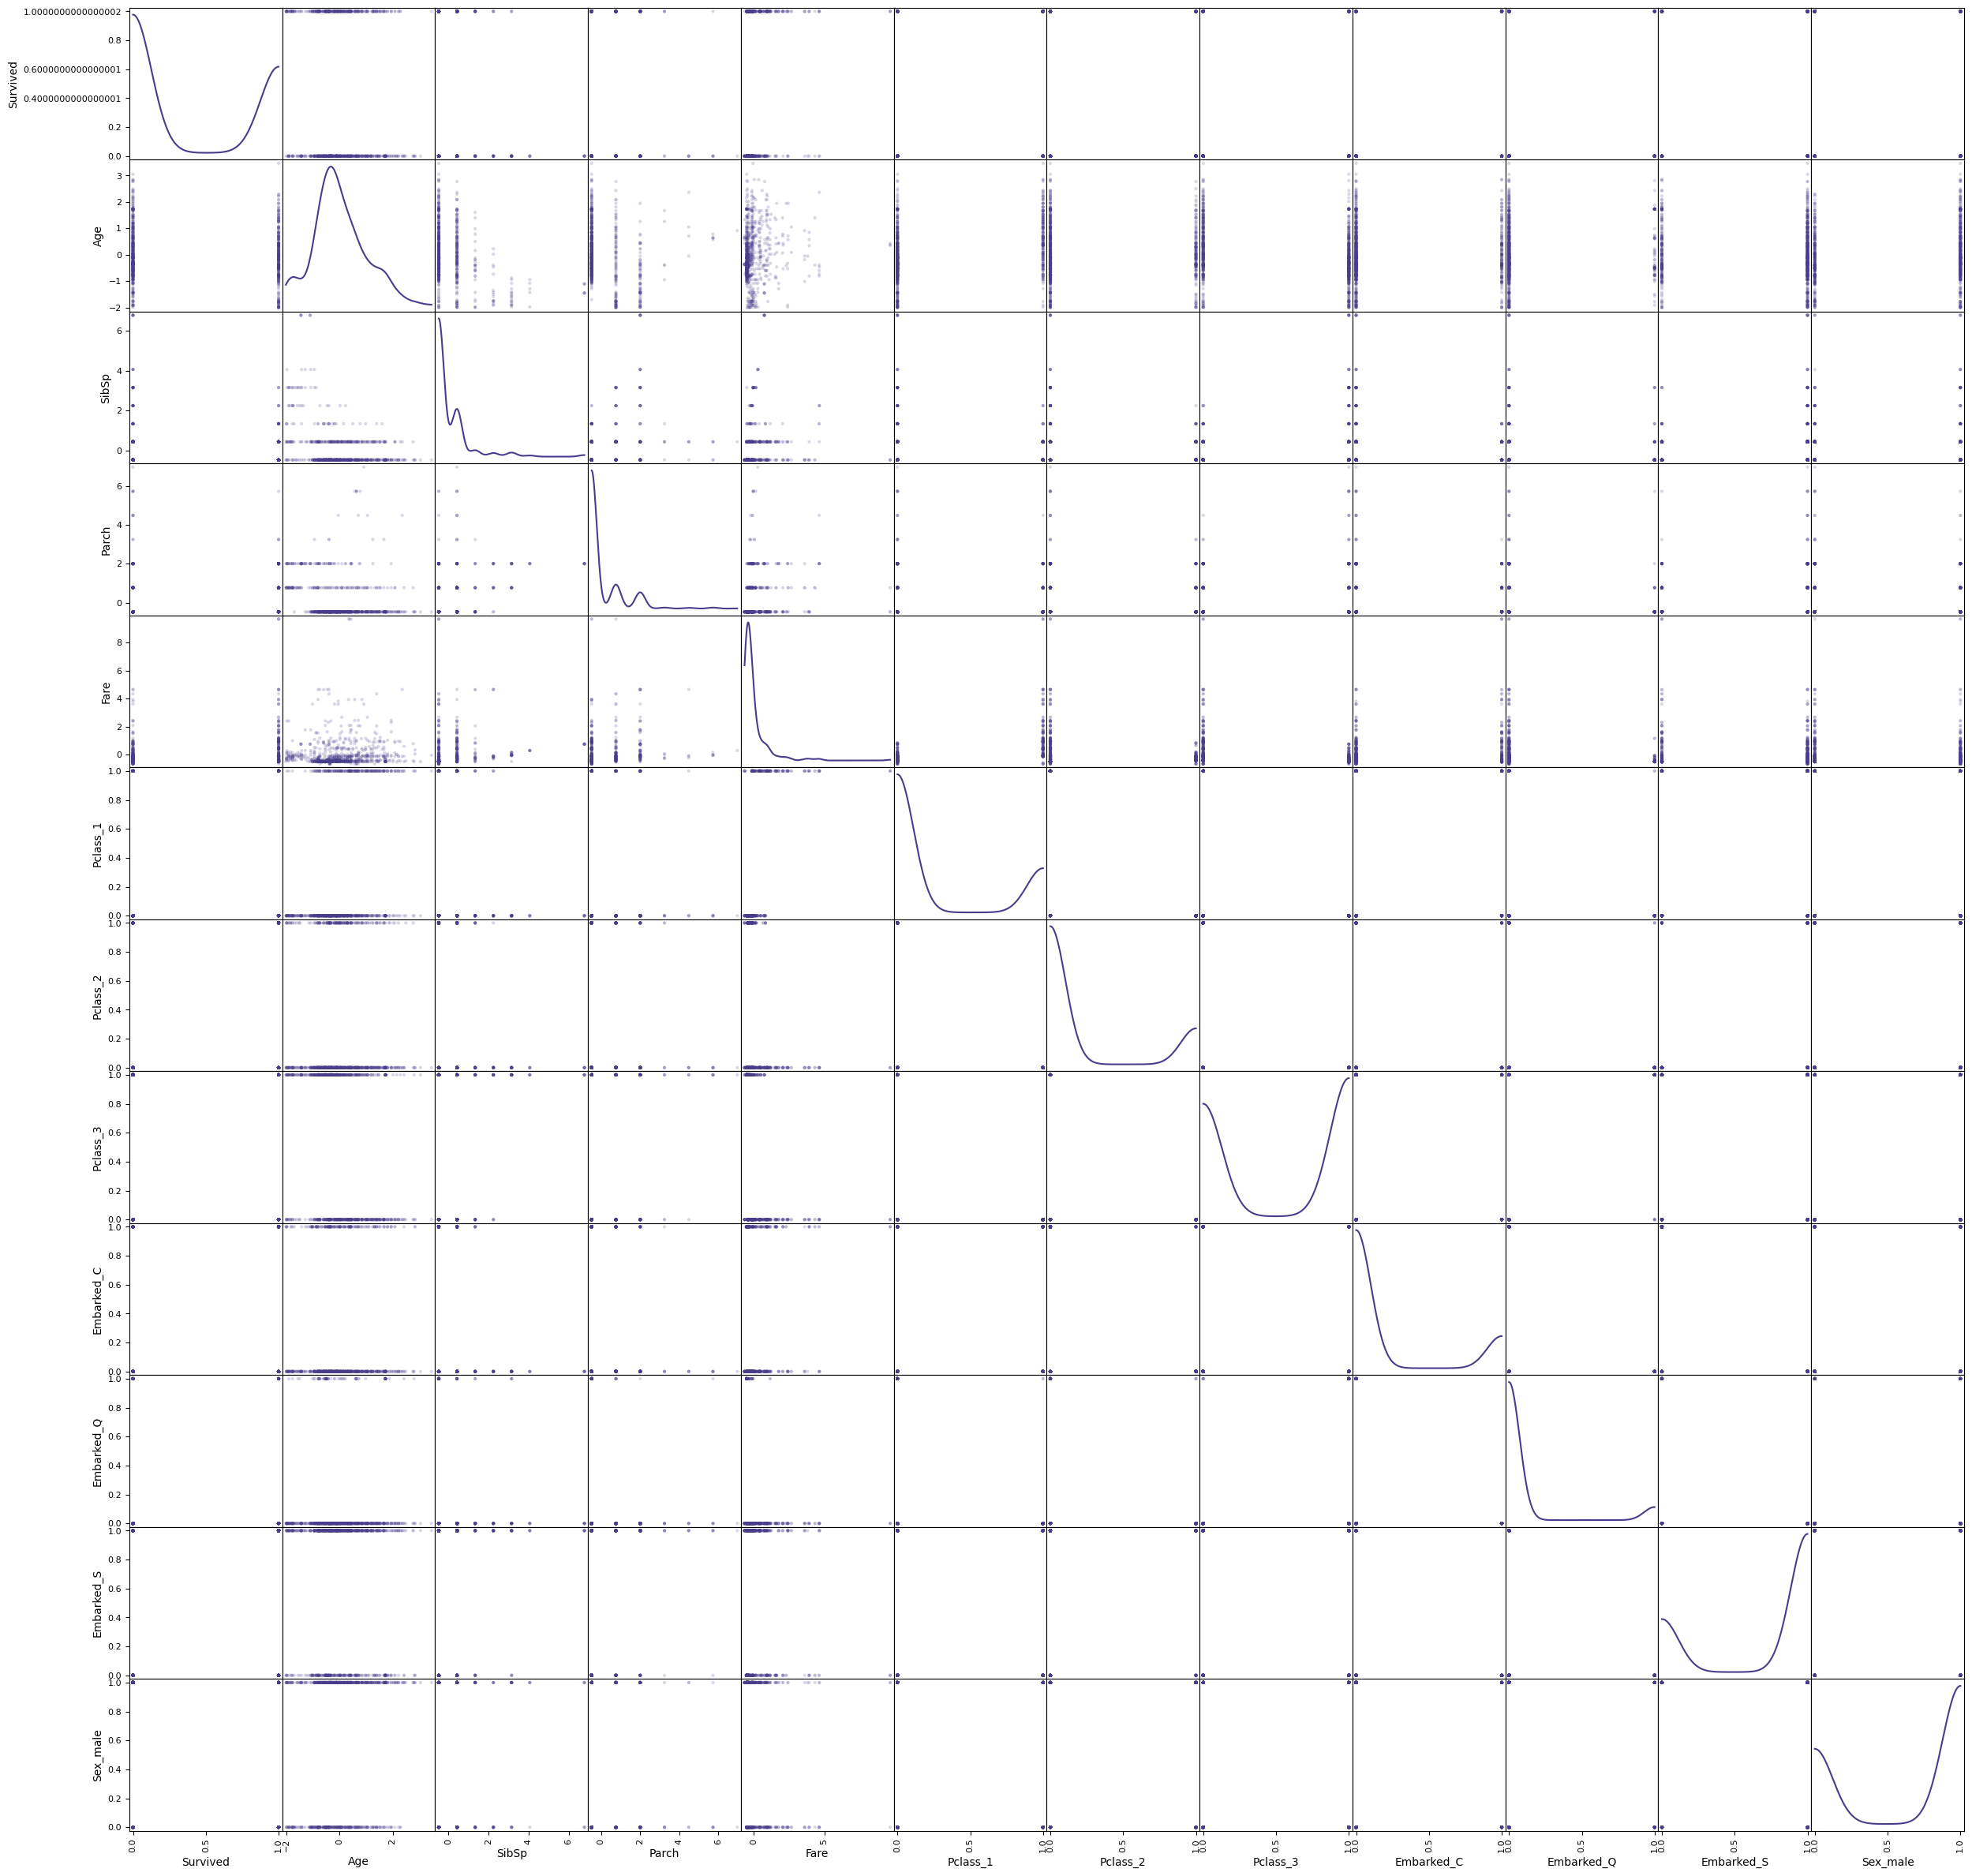

In [25]:
pd.plotting.scatter_matrix(train, alpha=0.2, figsize=(30,30), diagonal='kde', density_kwds = {"c": 'darkslateblue'}, c = 'darkslateblue')

The features are very nice, almost no collineaity

# Finding the optimal model

## Imports

In [1]:
# Resuming the session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

## Read pre-processed data

In [5]:
train = pd.read_csv("Datasets/Titanic/train_processed.csv")

train = train.sample(frac = 1, random_state = 852)

train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
618,1,-1.769120,1.339380,0.767199,0.136754,0.0,1.0,0.0,0.0,0.0,1.0,0.0
702,0,-0.805364,-0.474279,0.767199,-0.357190,0.0,0.0,1.0,1.0,0.0,0.0,0.0
636,0,0.158392,-0.474279,-0.473408,-0.488580,0.0,0.0,1.0,0.0,0.0,1.0,1.0
76,0,-0.116967,-0.474279,-0.473408,-0.489167,0.0,0.0,1.0,0.0,0.0,1.0,1.0
105,0,-0.116967,-0.474279,-0.473408,-0.489167,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
825,0,-0.552952,-0.474279,-0.473408,-0.508200,0.0,0.0,1.0,0.0,1.0,0.0,1.0
691,1,-1.769120,-0.474279,0.767199,-0.378068,0.0,0.0,1.0,1.0,0.0,0.0,0.0
690,1,0.089552,0.432550,-0.473408,0.498975,1.0,0.0,0.0,0.0,0.0,1.0,1.0
542,0,-1.287242,3.153038,2.007806,-0.018699,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Splitting target feature from the dataset

In [16]:
X = train.drop(["Survived"], axis = 1)
y = train["Survived"]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
618,-1.769120,1.339380,0.767199,0.136754,0.0,1.0,0.0,0.0,0.0,1.0,0.0
702,-0.805364,-0.474279,0.767199,-0.357190,0.0,0.0,1.0,1.0,0.0,0.0,0.0
636,0.158392,-0.474279,-0.473408,-0.488580,0.0,0.0,1.0,0.0,0.0,1.0,1.0
76,-0.116967,-0.474279,-0.473408,-0.489167,0.0,0.0,1.0,0.0,0.0,1.0,1.0
105,-0.116967,-0.474279,-0.473408,-0.489167,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
825,-0.552952,-0.474279,-0.473408,-0.508200,0.0,0.0,1.0,0.0,1.0,0.0,1.0
691,-1.769120,-0.474279,0.767199,-0.378068,0.0,0.0,1.0,1.0,0.0,0.0,0.0
690,0.089552,0.432550,-0.473408,0.498975,1.0,0.0,0.0,0.0,0.0,1.0,1.0
542,-1.287242,3.153038,2.007806,-0.018699,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Cross Validation testing of different models

### Cross Validation Helper function

In [39]:
# Do Later
def cv_score_std(cv_dict):
    score_array = cv_dict["test_score"]
    return score_array.mean(), score_array.std() 

### Cross Validation function parameters

In [54]:
# We use these params everytime for the cross_validate function
cv_params = {
    "scoring": "f1",
    "cv": 10,
    "n_jobs": 4,
    "error_score": "raise",
    "verbose": 0
}

### Importing Cross Validation module

In [12]:
from sklearn.model_selection import cross_validate

### Linear Regression Based Methods

#### Logit

In [47]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_results = cross_validate(estimator = clf, X = X, y = y, **cv_params)
score, std = cv_score_std(cv_results)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [48]:
print("Logit Score: " + str(score) + ", with S.D: " + str(std))

Logit Score: 0.7236568815965871, with S.D: 0.059843503741086115


### Ridge Classifier

In [55]:
from sklearn.linear_model import RidgeClassifier

alphas = np.linspace(0, 1, 100)

best_alpha = -1
best_score = -1
best_case_std = -1

for alpha in alphas:
    clf = RidgeClassifier(alpha = alpha)
    cv_results = cross_validate(estimator = clf, X = X, y = y, **cv_params)
    score, std = cv_score_std(cv_results)
    if score > best_score:
        best_alpha = alpha
        best_score = score
        best_case_std = std

/home/shivvorz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.56664e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shivvorz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.64628e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shivvorz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.3997e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [56]:
print("Ridge Classifier Score: " + str(score) + ", with S.D: " + str(std) + ", using alpha:" + str(alpha))

Ridge Classifier Score: 0.7212140979627558, with S.D: 0.058176682271875176, using alpha:1.0
